In [33]:
import pandas as pd
import hvplot.pandas
import requests

from api_key import geoapify_key

import matplotlib.pyplot as plt
import numpy as np

In [34]:
dataset_path = "./dataset_immigrantstat.csv"
immigrant_stat_pd = pd.read_csv(dataset_path)
immigrant_stat_pd

,REF_DATE,GEO,DGUID,Age (15C),Gender (3),Statistics (2),Immigrant status and period of immigration (9),VALUE
0,2021,Canada,2021A000011124,Total - Age,Total - Gender,2021 Counts,Total - Immigrant status and period of immigra...,36328475
1,2021,Canada,2021A000011124,Total - Age,Total - Gender,2021 Counts,Non-immigrants,27042120
2,2021,Canada,2021A000011124,Total - Age,Total - Gender,2021 Counts,Immigrants,8361505
3,2021,Canada,2021A000011124,Total - Age,Total - Gender,2021 Counts,Before 2001,3976410
4,2021,Canada,2021A000011124,Total - Age,Total - Gender,2021 Counts,2001 to 2005,911240
...,...,...,...,...,...,...,...,...
1552,2021,Nunavut,2021A000262,Total - Age,Total - Gender,2021 Counts,2001 to 2005,170
1553,2021,Nunavut,2021A000262,Total - Age,Total - Gender,2021 Counts,2006 to 2010,230
1554,2021,Nunavut,2021A000262,Total - Age,Total - Gender,2021 Counts,2011 to 2015,205
1555,2021,Nunavut,2021A000262,Total - Age,Total - Gender,2021 Counts,2016 to 2021,240


In [35]:
immigrant_stat_pd1 = immigrant_stat_pd[immigrant_stat_pd['GEO'].str.endswith(', Ont.')]
immigrant_stat_pd1

,REF_DATE,GEO,DGUID,Age (15C),Gender (3),Statistics (2),Immigrant status and period of immigration (9),VALUE
499,2021,"Barrie (CMA), Ont.",2021S0503568,Total - Age,Total - Gender,2021 Counts,Total - Immigrant status and period of immigra...,210155
500,2021,"Barrie (CMA), Ont.",2021S0503568,Total - Age,Total - Gender,2021 Counts,Non-immigrants,171400
501,2021,"Barrie (CMA), Ont.",2021S0503568,Total - Age,Total - Gender,2021 Counts,Immigrants,35340
502,2021,"Barrie (CMA), Ont.",2021S0503568,Total - Age,Total - Gender,2021 Counts,Before 2001,20395
503,2021,"Barrie (CMA), Ont.",2021S0503568,Total - Age,Total - Gender,2021 Counts,2001 to 2005,3465
...,...,...,...,...,...,...,...,...
913,2021,"Woodstock (CA), Ont.",2021S0504544,Total - Age,Total - Gender,2021 Counts,2001 to 2005,550
914,2021,"Woodstock (CA), Ont.",2021S0504544,Total - Age,Total - Gender,2021 Counts,2006 to 2010,800
915,2021,"Woodstock (CA), Ont.",2021S0504544,Total - Age,Total - Gender,2021 Counts,2011 to 2015,835
916,2021,"Woodstock (CA), Ont.",2021S0504544,Total - Age,Total - Gender,2021 Counts,2016 to 2021,950


In [36]:
clean_df = pd.DataFrame(columns=[
    "Name",
    "lat",
    "lng",
    "Non-immigrants",
    "Immigrants",
    "Before 2001",
    "2001 to 2005",
    "2006 to 2010",
    "2011 to 2015",
    "2016 to 2021",
    "Non-permanent residents"])
for index, row in immigrant_stat_pd1.iterrows():
    region_name = row["GEO"]
    clean_df.at[region_name, "Name"] = row["GEO"].replace("(CMA)", "").replace("(CA)", "").replace("Ont.", "Ontario")
    if row["Immigrant status and period of immigration (9)"] == "Non-immigrants":
        clean_df.at[region_name, "Non-immigrants"] = int(row["VALUE"])
    elif row["Immigrant status and period of immigration (9)"] == "Immigrants":
        clean_df.at[region_name, "Immigrants"] = int(row["VALUE"])
    elif row["Immigrant status and period of immigration (9)"] == "Before 2001":
        clean_df.at[region_name, "Before 2001"] = int(row["VALUE"])
    elif row["Immigrant status and period of immigration (9)"] == "2001 to 2005":
        clean_df.at[region_name, "2001 to 2005"] = int(row["VALUE"])
    elif row["Immigrant status and period of immigration (9)"] == "2006 to 2010":
        clean_df.at[region_name, "2006 to 2010"] = int(row["VALUE"])
    elif row["Immigrant status and period of immigration (9)"] == "2011 to 2015":
        clean_df.at[region_name, "2011 to 2015"] = int(row["VALUE"])
    elif row["Immigrant status and period of immigration (9)"] == "2016 to 2021":
        clean_df.at[region_name, "2016 to 2021"] = int(row["VALUE"])
    elif row["Immigrant status and period of immigration (9)"] == "Non-permanent residents":
        clean_df.at[region_name, "Non-permanent residents"] = int(row["VALUE"])
clean_df = clean_df.reset_index()
clean_df = clean_df.drop("index", axis=1)
clean_df

,Name,lat,lng,Non-immigrants,Immigrants,Before 2001,2001 to 2005,2006 to 2010,2011 to 2015,2016 to 2021,Non-permanent residents
0,"Barrie , Ontario",NaN,NaN,171400,35340,20395,3465,3545,3780,4160,3405
1,"Belleville - Quinte West , Ontario",NaN,NaN,99070,9065,6040,730,740,685,870,1115
2,"Brantford , Ontario",NaN,NaN,120245,20235,12485,1735,1855,1885,2265,1430
3,"Brockville , Ontario",NaN,NaN,27930,2855,2075,155,200,165,260,95
4,"Centre Wellington , Ontario",NaN,NaN,27085,3450,2615,215,225,175,220,110
5,"Chatham-Kent , Ontario",NaN,NaN,92315,9245,6290,830,690,585,845,530
6,"Cobourg , Ontario",NaN,NaN,17190,2550,2080,100,75,105,195,40
7,"Collingwood , Ontario",NaN,NaN,20945,3205,2340,215,215,160,285,120
8,"Cornwall , Ontario",NaN,NaN,54655,4525,2490,455,450,475,655,570
9,"Elliot Lake , Ontario",NaN,NaN,10030,1175,1090,35,15,15,25,15


In [37]:
# start finding lat and lng for each region
geocode_base_url = "https://api.geoapify.com/v1/geocode/search"
geocode_params = {
    "text":"",
    "lang":"en",
    "limit":1,
    "type":"city",
    "state": "ON",
    "filter":"countrycode:ca",
    "apiKey":geoapify_key, 
}
for index, row in clean_df.iterrows():
    print("Searching for ", row["Name"])
    geocode_params["text"] = row["Name"]
    resp = requests.get(geocode_base_url, params=geocode_params)
    if resp.status_code == 200:
        geocode_data = resp.json()
        if len(geocode_data["features"]) > 0:
            clean_df.at[index, "lat"] = geocode_data["features"][0]["properties"]["lat"]
            clean_df.at[index, "lng"] = geocode_data["features"][0]["properties"]["lon"]

clean_df

Searching for  Barrie , Ontario
Searching for  Belleville - Quinte West , Ontario
Searching for  Brantford , Ontario
Searching for  Brockville , Ontario
Searching for  Centre Wellington , Ontario
Searching for  Chatham-Kent , Ontario
Searching for  Cobourg , Ontario
Searching for  Collingwood , Ontario
Searching for  Cornwall , Ontario
Searching for  Elliot Lake , Ontario
Searching for  Essa , Ontario
Searching for  Greater Sudbury , Ontario
Searching for  Guelph , Ontario
Searching for  Hamilton , Ontario
Searching for  Hawkesbury (Ontario part) , Ontario
Searching for  Ingersoll , Ontario
Searching for  Kawartha Lakes , Ontario
Searching for  Kenora , Ontario
Searching for  Kingston , Ontario
Searching for  Kitchener - Cambridge - Waterloo , Ontario
Searching for  London , Ontario
Searching for  Midland , Ontario
Searching for  Norfolk , Ontario
Searching for  North Bay , Ontario
Searching for  Orillia , Ontario
Searching for  Oshawa , Ontario
Searching for  Ottawa - Gatineau (Ontari

,Name,lat,lng,Non-immigrants,Immigrants,Before 2001,2001 to 2005,2006 to 2010,2011 to 2015,2016 to 2021,Non-permanent residents
0,"Barrie , Ontario",44.389311,-79.690174,171400,35340,20395,3465,3545,3780,4160,3405
1,"Belleville - Quinte West , Ontario",44.098825,-77.574855,99070,9065,6040,730,740,685,870,1115
2,"Brantford , Ontario",43.140816,-80.263173,120245,20235,12485,1735,1855,1885,2265,1430
3,"Brockville , Ontario",44.589593,-75.684333,27930,2855,2075,155,200,165,260,95
4,"Centre Wellington , Ontario",43.718093,-80.374774,27085,3450,2615,215,225,175,220,110
5,"Chatham-Kent , Ontario",41.875,-82.238725,92315,9245,6290,830,690,585,845,530
6,"Cobourg , Ontario",43.9596,-78.167778,17190,2550,2080,100,75,105,195,40
7,"Collingwood , Ontario",44.502723,-80.217238,20945,3205,2340,215,215,160,285,120
8,"Cornwall , Ontario",45.018442,-74.728703,54655,4525,2490,455,450,475,655,570
9,"Elliot Lake , Ontario",46.373464,-82.652893,10030,1175,1090,35,15,15,25,15


In [38]:
# %%capture --no-display

# put data on the map
clean_df = clean_df.astype({
    "lat": "float64",
    "lng": "float64",
    "Non-immigrants": "int64",
    "Immigrants": "int64",
    "Before 2001": "int64",
    "2001 to 2005": "int64",
    "2006 to 2010": "int64",
    "2011 to 2015": "int64",
    "2016 to 2021": "int64",
    "Non-permanent residents": "int64",
})
map_plot_1 = clean_df.hvplot.points(
    "lng",
    "lat",
    geo = True,
    tiles = "EsriNatGeo",
    hover_cols=["Name", "Non-immigrants", "Immigrants", "Non-permanent residents", "" ],
    size="Immigrants",
    scale=0.025,
) 

# Display the map
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lng,lat]   (Immigrants,Name,Non-immigrants,Non-permanent residents)

In [39]:
Total_pop = clean_df["Non-immigrants"]+clean_df["Immigrants"]+clean_df["Non-permanent residents"]
clean_df["percentage-non-immigrant"] = clean_df['Non-immigrants']/Total_pop*100
clean_df


,Name,lat,lng,Non-immigrants,Immigrants,Before 2001,2001 to 2005,2006 to 2010,2011 to 2015,2016 to 2021,Non-permanent residents,percentage-non-immigrant
0,"Barrie , Ontario",44.389311,-79.690174,171400,35340,20395,3465,3545,3780,4160,3405,81.562730
1,"Belleville - Quinte West , Ontario",44.098825,-77.574855,99070,9065,6040,730,740,685,870,1115,90.681922
2,"Brantford , Ontario",43.140816,-80.263173,120245,20235,12485,1735,1855,1885,2265,1430,84.733282
3,"Brockville , Ontario",44.589593,-75.684333,27930,2855,2075,155,200,165,260,95,90.446891
4,"Centre Wellington , Ontario",43.718093,-80.374774,27085,3450,2615,215,225,175,220,110,88.383097
5,"Chatham-Kent , Ontario",41.875000,-82.238725,92315,9245,6290,830,690,585,845,530,90.425115
6,"Cobourg , Ontario",43.959600,-78.167778,17190,2550,2080,100,75,105,195,40,86.905966
7,"Collingwood , Ontario",44.502723,-80.217238,20945,3205,2340,215,215,160,285,120,86.299959
8,"Cornwall , Ontario",45.018442,-74.728703,54655,4525,2490,455,450,475,655,570,91.472803
9,"Elliot Lake , Ontario",46.373464,-82.652893,10030,1175,1090,35,15,15,25,15,89.393939


In [31]:
clean_df["percentage of immigrants"] = clean_df['Immigrants']/Total_pop*100
clean_df

,Name,lat,lng,Non-immigrants,Immigrants,Before 2001,2001 to 2005,2006 to 2010,2011 to 2015,2016 to 2021,Non-permanent residents,percentage-non-immigrant,percentage of immigrants
0,"Barrie , Ontario",44.389311,-79.690174,171400,35340,20395,3465,3545,3780,4160,3405,81.562730,16.816960
1,"Belleville - Quinte West , Ontario",44.098825,-77.574855,99070,9065,6040,730,740,685,870,1115,90.681922,8.297483
2,"Brantford , Ontario",43.140816,-80.263173,120245,20235,12485,1735,1855,1885,2265,1430,84.733282,14.259037
3,"Brockville , Ontario",44.589593,-75.684333,27930,2855,2075,155,200,165,260,95,90.446891,9.245466
4,"Centre Wellington , Ontario",43.718093,-80.374774,27085,3450,2615,215,225,175,220,110,88.383097,11.257954
5,"Chatham-Kent , Ontario",41.875000,-82.238725,92315,9245,6290,830,690,585,845,530,90.425115,9.055735
6,"Cobourg , Ontario",43.959600,-78.167778,17190,2550,2080,100,75,105,195,40,86.905966,12.891810
7,"Collingwood , Ontario",44.502723,-80.217238,20945,3205,2340,215,215,160,285,120,86.299959,13.205604
8,"Cornwall , Ontario",45.018442,-74.728703,54655,4525,2490,455,450,475,655,570,91.472803,7.573222
9,"Elliot Lake , Ontario",46.373464,-82.652893,10030,1175,1090,35,15,15,25,15,89.393939,10.472371


In [32]:
clean_df["percentage of Non PR"] = clean_df['Non-permanent residents']/Total_pop*100
clean_df

,Name,lat,lng,Non-immigrants,Immigrants,Before 2001,2001 to 2005,2006 to 2010,2011 to 2015,2016 to 2021,Non-permanent residents,percentage-non-immigrant,percentage of immigrants,percentage of Non PR
0,"Barrie , Ontario",44.389311,-79.690174,171400,35340,20395,3465,3545,3780,4160,3405,81.562730,16.816960,1.620310
1,"Belleville - Quinte West , Ontario",44.098825,-77.574855,99070,9065,6040,730,740,685,870,1115,90.681922,8.297483,1.020595
2,"Brantford , Ontario",43.140816,-80.263173,120245,20235,12485,1735,1855,1885,2265,1430,84.733282,14.259037,1.007681
3,"Brockville , Ontario",44.589593,-75.684333,27930,2855,2075,155,200,165,260,95,90.446891,9.245466,0.307642
4,"Centre Wellington , Ontario",43.718093,-80.374774,27085,3450,2615,215,225,175,220,110,88.383097,11.257954,0.358949
5,"Chatham-Kent , Ontario",41.875000,-82.238725,92315,9245,6290,830,690,585,845,530,90.425115,9.055735,0.519150
6,"Cobourg , Ontario",43.959600,-78.167778,17190,2550,2080,100,75,105,195,40,86.905966,12.891810,0.202224
7,"Collingwood , Ontario",44.502723,-80.217238,20945,3205,2340,215,215,160,285,120,86.299959,13.205604,0.494438
8,"Cornwall , Ontario",45.018442,-74.728703,54655,4525,2490,455,450,475,655,570,91.472803,7.573222,0.953975
9,"Elliot Lake , Ontario",46.373464,-82.652893,10030,1175,1090,35,15,15,25,15,89.393939,10.472371,0.133690


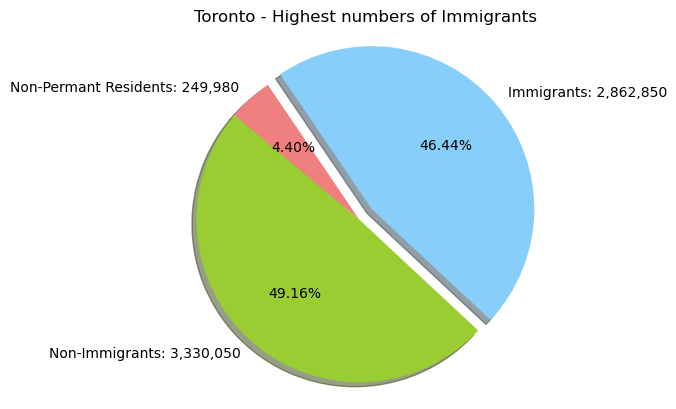

In [69]:
categories = ["Non-Immigrants: 3,330,050", "Immigrants: 2,862,850", "Non-Permant Residents: 249,980"]
percentage = [49.33, 46.60, 4.41]
colors = ["yellowgreen","lightskyblue","lightcoral"]
explode = (0,0.1,0)

plt.pie(percentage, explode=explode, labels=categories, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Toronto - Highest numbers of Immigrants")

# plt.legend(handles=["Non-Immigrants: 3030050", "Immigrants: 2862850", "Non-Permanant residants: 249980"], loc="best")
# Save an image of our chart and print the final product to the screen
plt.show()

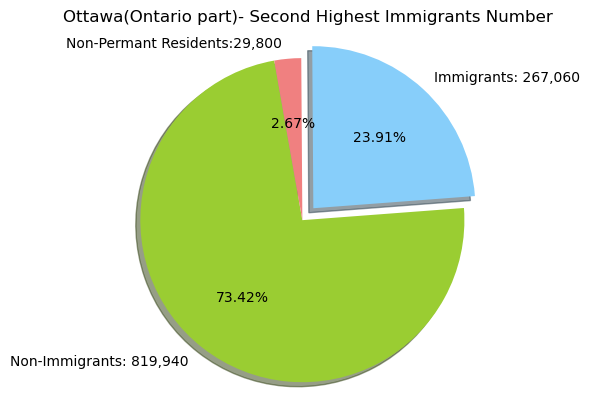

In [70]:
categories = ["Non-Immigrants: 819,940 ", "Immigrants: 267,060", "Non-Permant Residents:29,800 "]
percentage = [73.42,23.91,2.67]
colors = ["yellowgreen","lightskyblue","lightcoral"]
explode = (0,0.1,0)

plt.pie(percentage, explode=explode, labels=categories, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=100)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Ottawa(Ontario part)- Second Highest Immigrants Number")
# Save an image of our chart and print the final product to the screen
plt.show()